In [ ]:
import pandas as pd
import os

# Check the current working directory
print(os.listdir('.'))
# Load the gzip compressed CSV file
file_path = 'user_attributes.csv.gz'  # Update with the correct path if needed
try:
    data = pd.read_csv('user_attribures.csv.gz', compression='gzip')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("No data found in the file.")
except pd.errors.ParserError:
    print("Error parsing the file.")

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Display the structure of the DataFrame
print("\nDataFrame structure:")
print(data.info())

# Display descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Optional: Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


['.config', 'user_attribures.csv.gz', 'sample_data']
Data loaded successfully!

First few rows of the dataset:
   user_id                name                      email gender  age  \
0    94277      Julie Mcdaniel           kyle41@yahoo.com      F   57   
1    61121      Anthony Jacobs          allen36@yahoo.com      M   65   
2    67609         Anna Martin   clarkmaurice@hotmail.com      F   65   
3    54233      Derek Johnston    yolandacarter@yahoo.com      M   26   
4    72541  Dr. Lucas Jennings  bryanlivingston@yahoo.com      M   28   

            location account_creation_date      last_login_date  total_spent  \
0       New Kathleen   2024-05-31 00:00:00  2024-06-21 00:00:00      7181.36   
1         Davidmouth   2024-04-20 00:00:00  2024-03-20 00:00:00      4676.37   
2  West Michellefurt   2024-02-23 00:00:00  2024-02-03 00:00:00        86.95   
3         North Todd   2024-01-21 00:00:00  2024-05-23 00:00:00        57.79   
4         New Melody   2024-02-18 00:00:00  2024-0

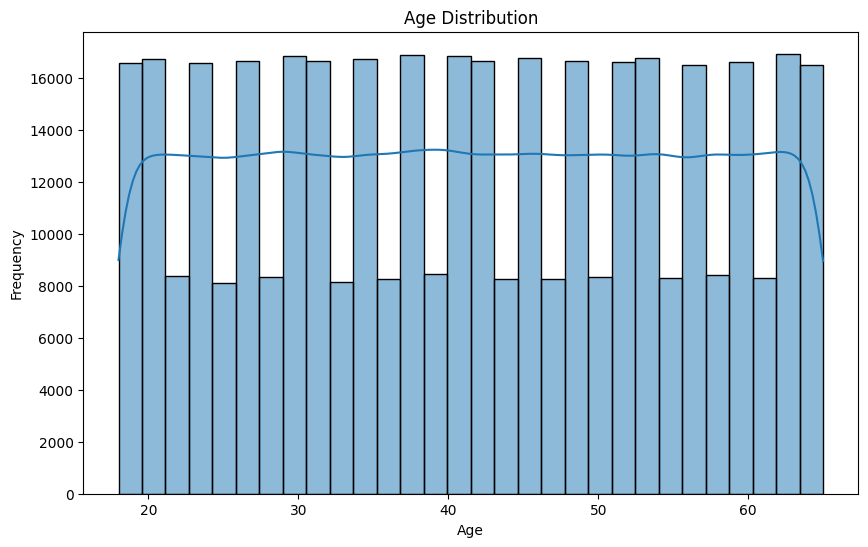

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


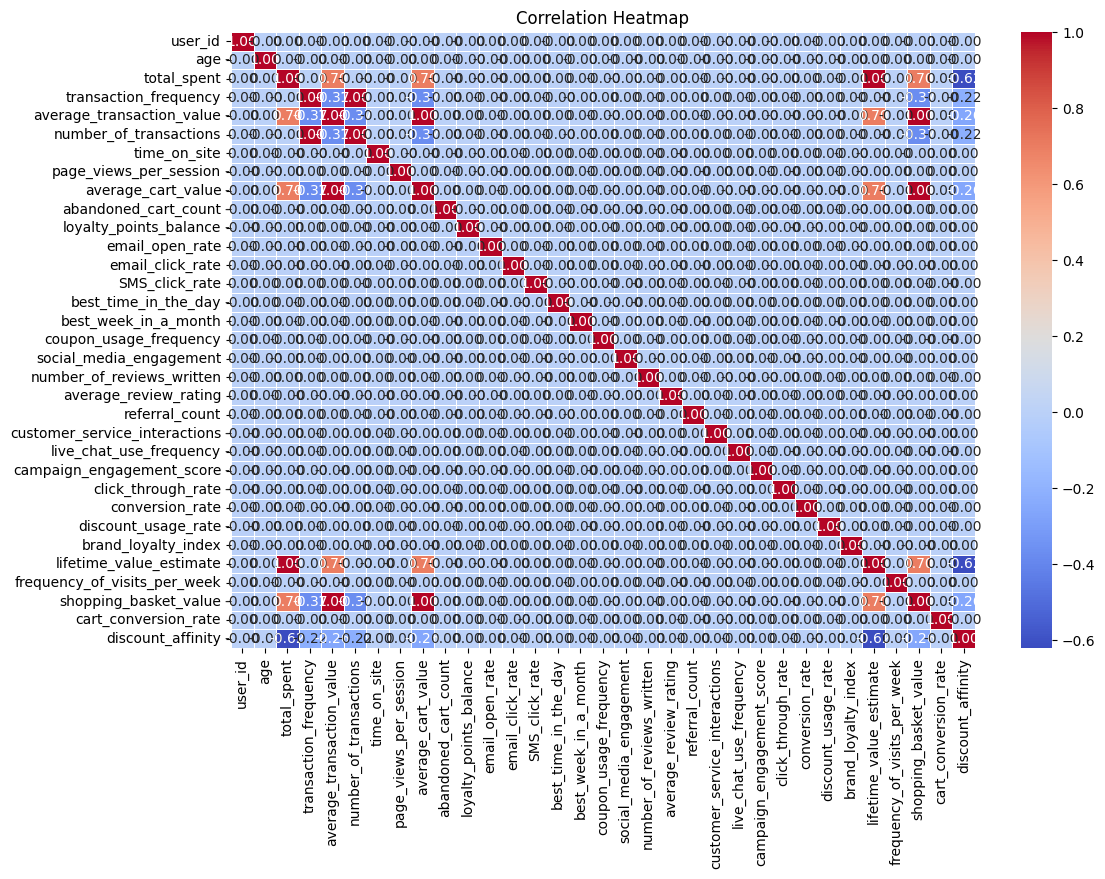

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data['account_creation_date'] = pd.to_datetime(data['account_creation_date'])
data['last_login_date'] = pd.to_datetime(data['last_login_date'])


In [ ]:
data['account_creation_year'] = data['account_creation_date'].dt.year


In [ ]:
from scipy import stats

# Example: T-test to compare total spent between two groups (e.g., genders)
male_total_spent = data[data['gender'] == 'Male']['total_spent']
female_total_spent = data[data['gender'] == 'Female']['total_spent']
t_stat, p_value = stats.ttest_ind(male_total_spent, female_total_spent)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: nan, P-value: nan


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
X = data[['age', 'total_spent', 'transaction_frequency']]  # Example features
y = data['lifetime_value_estimate']  # Example target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)


Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


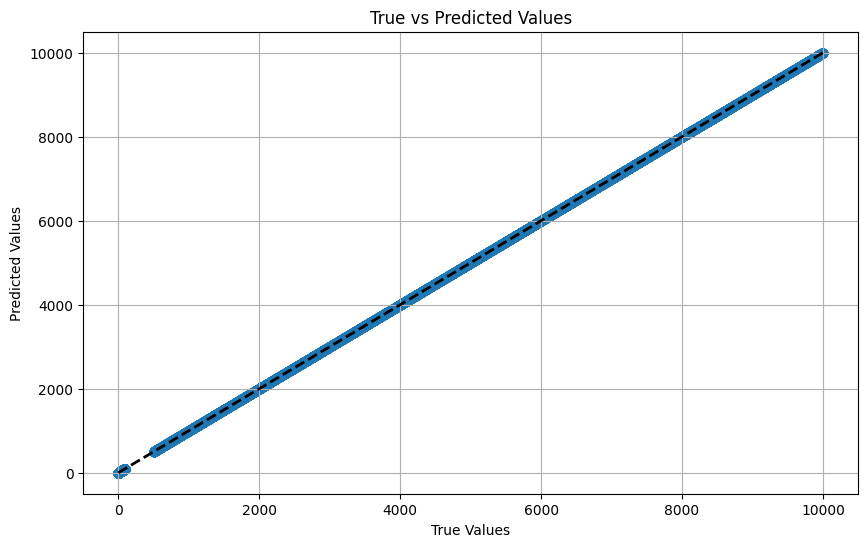

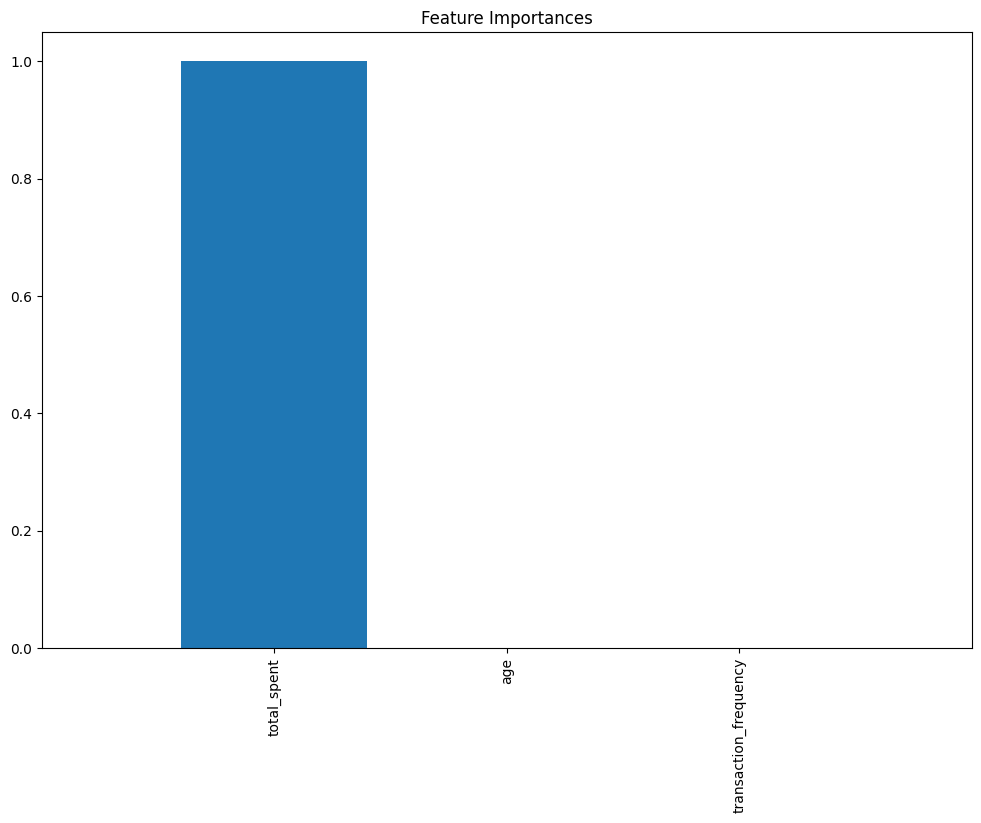

In [ ]:
# Import necessary libraries for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Optional: Plotting feature importances
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
data_sample = data.sample(frac=0.5, random_state=42)  # Use 50% of the data


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import gc

# Load the dataset
data = pd.read_csv('/content/user_attribures.csv.gz', compression='gzip')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Define features and target variable
X = data[['age', 'total_spent', 'transaction_frequency']]  # Replace with your actual feature columns
y = data['lifetime_value_estimate']  # Replace with your actual target column name

# Check if the target column exists in the DataFrame
if 'lifetime_value_estimate' not in data.columns:
    raise KeyError("'lifetime_value_estimate' not found in DataFrame columns. Please update the target column name.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object with fewer jobs to conserve memory
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

# Clear any previous variables to free up memory
gc.collect()

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}'
# Make predictions on the test set
y_pred = grid_search.predict(X_test))
print(f'R-squared: {r2}')

# Optionally, display feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


   user_id                name                      email gender  age  \
0    94277      Julie Mcdaniel           kyle41@yahoo.com      F   57   
1    61121      Anthony Jacobs          allen36@yahoo.com      M   65   
2    67609         Anna Martin   clarkmaurice@hotmail.com      F   65   
3    54233      Derek Johnston    yolandacarter@yahoo.com      M   26   
4    72541  Dr. Lucas Jennings  bryanlivingston@yahoo.com      M   28   

            location account_creation_date      last_login_date  total_spent  \
0       New Kathleen   2024-05-31 00:00:00  2024-06-21 00:00:00      7181.36   
1         Davidmouth   2024-04-20 00:00:00  2024-03-20 00:00:00      4676.37   
2  West Michellefurt   2024-02-23 00:00:00  2024-02-03 00:00:00        86.95   
3         North Todd   2024-01-21 00:00:00  2024-05-23 00:00:00        57.79   
4         New Melody   2024-02-18 00:00:00  2024-01-25 00:00:00      9020.45   

   transaction_frequency  ...  brand_loyalty_index lifetime_value_estimate  \
0 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 28.013862021114875
R-squared: 0.9999973249774924
                 Feature  Importance
1            total_spent    0.999661
0                    age    0.000234
2  transaction_frequency    0.000105


In [10]:
import joblib
!pip install joblib


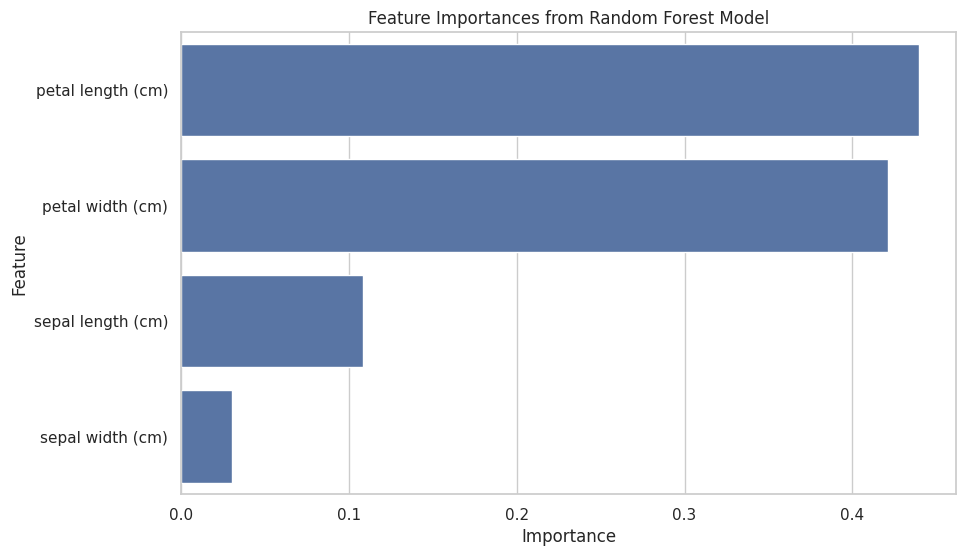

In [12]:
#Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

                            MSE       R^2
Random Forest      1.061199e-03  1.000000
Gradient Boosting  2.399374e+02  0.999977
Linear Regression  1.876868e-23  1.000000


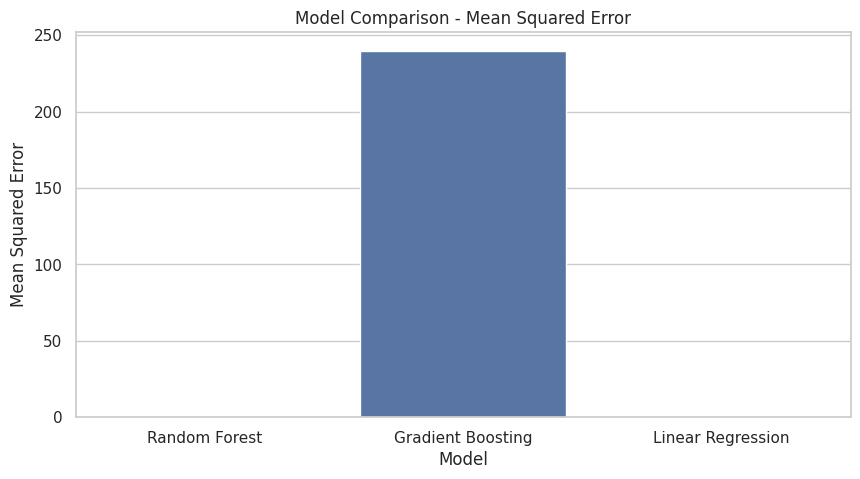

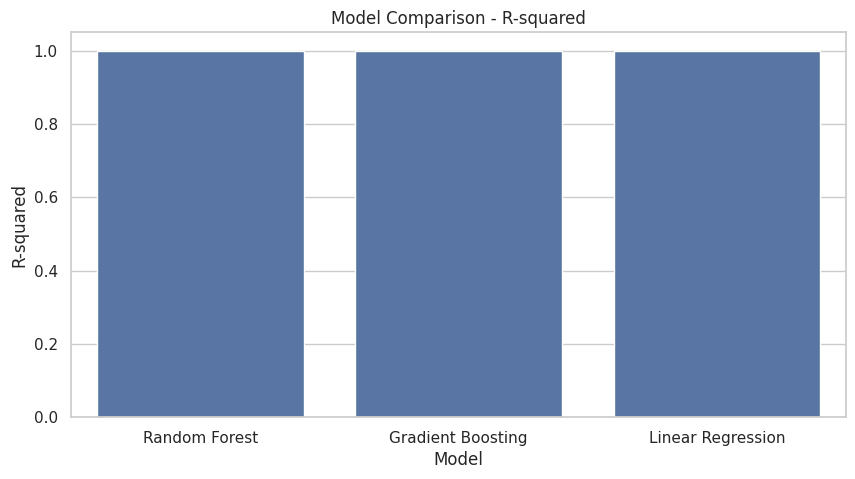

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/user_attribures.csv.gz', compression='gzip')

# Define features and target variable
X = data[['age', 'total_spent', 'transaction_frequency']]
y = data['lifetime_value_estimate']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R^2': r2}

# Create a DataFrame to display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.reset_index(), x='index', y='MSE')
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.reset_index(), x='index', y='R^2')
plt.title('Model Comparison - R-squared')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()


                            MSE       R^2
Random Forest      1.061854e-03  1.000000
Gradient Boosting  2.399374e+02  0.999977
Linear Regression  8.974060e-24  1.000000


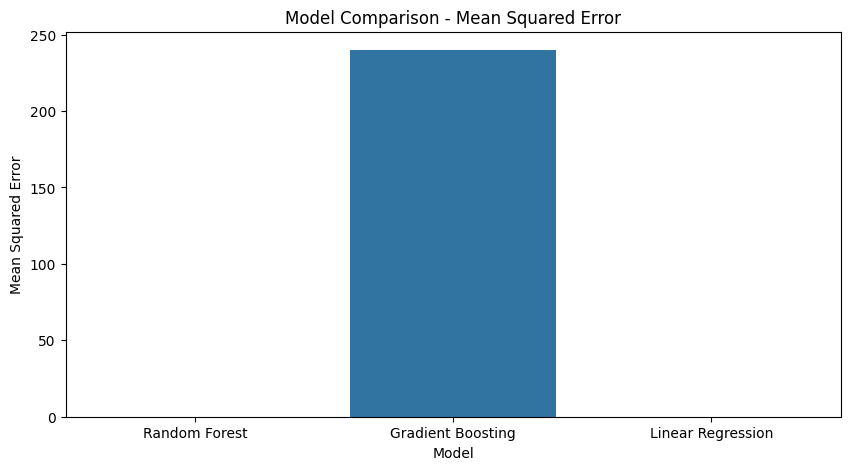

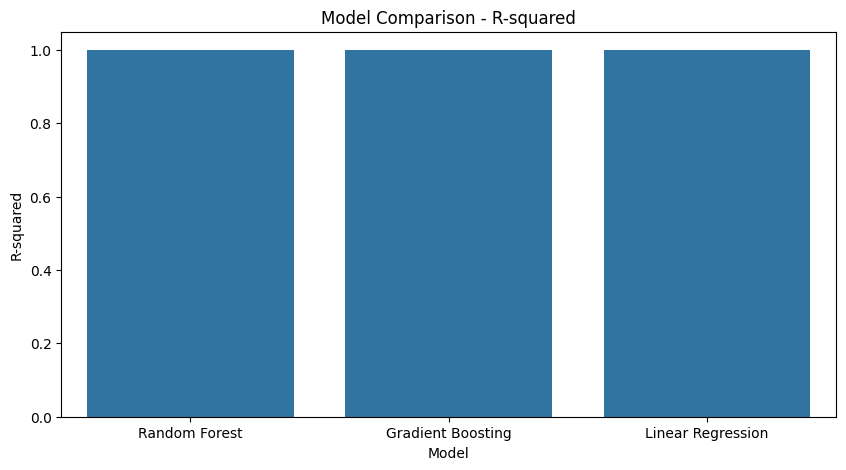

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/user_attribures.csv.gz', compression='gzip')

# Define features and target variable
X = data[['age', 'total_spent', 'transaction_frequency']]
y = data['lifetime_value_estimate']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R^2': r2}

# Create a DataFrame to display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize and save the results as files
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.reset_index(), x='index', y='MSE')
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.savefig('model_comparison_mse.png')  # Save the graph as PNG
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.reset_index(), x='index', y='R^2')
plt.title('Model Comparison - R-squared')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.savefig('model_comparison_r2.png')  # Save the graph as PNG
plt.show()
